In [166]:
import streamlit as st;
import numpy as np;
import seaborn as sns;
import pandas as pd;
import re;
%matplotlib inline

In [167]:
f=open('./WhatsApp Chat with Valorant boys🔪🗡️🛡️🔫💣🧨.txt','r',encoding='utf-8')
data=f.read()

In [168]:
dummy=data.split('\n')
dummy[:5]

['4/28/21, 1:58 PM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '7/30/20, 7:23 PM - Vignesh created group "Valorant boys🔪🗡️🛡️🔫💣🧨"',
 '4/28/21, 1:58 PM - Vishwajith Krishna added you',
 '4/29/21, 4:47 PM - RAJASHEKAR V.T: https://youtu.be/h-0NbkvYBRU',
 '4/29/21, 4:49 PM - Vignesh: Pro👌🏼']

In [169]:
pattern=r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s\D{2}\s-\s'
messages=re.split(pattern,data)[1:]
dates=re.findall(pattern,data)

In [170]:
messages[:2]

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Vignesh created group "Valorant boys🔪🗡️🛡️🔫💣🧨"\n']

In [171]:
dates[:2]

['4/28/21, 1:58 PM - ', '7/30/20, 7:23 PM - ']

In [172]:
def gettimeanddate(string):
    string=string.split(',')
    date,time=string[0],string[1]
    time=time.split('-')
    text=time[0].strip()
    time=re.findall(r'\d{1,2}:\d{1,2}',text)[0]
    return date + " " + time

In [173]:
df=pd.DataFrame({'user_messages':messages,
                     'message_date':dates})

In [174]:
df

,user_messages,message_date
0,Messages and calls are end-to-end encrypted. N...,"4/28/21, 1:58 PM -"
1,"Vignesh created group ""Valorant boys🔪🗡️🛡️🔫💣🧨""\n","7/30/20, 7:23 PM -"
2,Vishwajith Krishna added you\n,"4/28/21, 1:58 PM -"
3,RAJASHEKAR V.T: https://youtu.be/h-0NbkvYBRU\n,"4/29/21, 4:47 PM -"
4,Vignesh: Pro👌🏼\n,"4/29/21, 4:49 PM -"
...,...,...
3586,Vishwajith Krishna: Bro\n,"10/19/22, 11:43 PM -"
3587,Vishwajith Krishna: 🥲🔫\n,"10/19/22, 11:43 PM -"
3588,RAJASHEKAR V.T: 🤝🤝😂😂\n,"10/19/22, 11:44 PM -"
3589,Mr. Smokey: Anyone playing?\n,"10/20/22, 10:22 PM -"


In [175]:
df['message_date']=df['message_date'].apply(lambda text:gettimeanddate(text))
df.rename(columns={'message_date':'Date'},inplace=True)

In [176]:
df

,user_messages,Date
0,Messages and calls are end-to-end encrypted. N...,4/28/21 1:58
1,"Vignesh created group ""Valorant boys🔪🗡️🛡️🔫💣🧨""\n",7/30/20 7:23
2,Vishwajith Krishna added you\n,4/28/21 1:58
3,RAJASHEKAR V.T: https://youtu.be/h-0NbkvYBRU\n,4/29/21 4:47
4,Vignesh: Pro👌🏼\n,4/29/21 4:49
...,...,...
3586,Vishwajith Krishna: Bro\n,10/19/22 11:43
3587,Vishwajith Krishna: 🥲🔫\n,10/19/22 11:43
3588,RAJASHEKAR V.T: 🤝🤝😂😂\n,10/19/22 11:44
3589,Mr. Smokey: Anyone playing?\n,10/20/22 10:22


In [177]:
users=[]
messages=[]
    
for message in df['user_messages']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]:
            users.append(entry[1])
            messages.append(entry[2])
    else:
        users.append('Group Notification')
        messages.append(entry[0])   
df['Users']=users
df['Messages']=messages
 
def getstring(text):
    return text.split('\n')[0]
   


In [178]:
df['Messages'] = df['Messages'].apply(lambda text: getstring(text))

df = df.drop(['user_messages'], axis=1)



In [179]:
df

,Date,Users,Messages
0,4/28/21 1:58,Group Notification,Messages and calls are end-to-end encrypted. N...
1,7/30/20 7:23,Group Notification,"Vignesh created group ""Valorant boys🔪🗡️🛡️🔫💣🧨"""
2,4/28/21 1:58,Group Notification,Vishwajith Krishna added you
3,4/29/21 4:47,RAJASHEKAR V.T,https://youtu.be/h-0NbkvYBRU
4,4/29/21 4:49,Vignesh,Pro👌🏼
...,...,...,...
3586,10/19/22 11:43,Vishwajith Krishna,Bro
3587,10/19/22 11:43,Vishwajith Krishna,🥲🔫
3588,10/19/22 11:44,RAJASHEKAR V.T,🤝🤝😂😂
3589,10/20/22 10:22,Mr. Smokey,Anyone playing?


In [180]:


df['Only date'] = pd.to_datetime(df['Date']).dt.date

df['Year'] = pd.to_datetime(df['Date']).dt.year

df['Month_num'] = pd.to_datetime(df['Date']).dt.month

df['Month'] = pd.to_datetime(df['Date']).dt.month_name()

df['Day'] = pd.to_datetime(df['Date']).dt.day

df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()

df['Hour'] = pd.to_datetime(df['Date']).dt.hour

df['Minute'] = pd.to_datetime(df['Date']).dt.minute

In [181]:
df.head()

,Date,Users,Messages,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,4/28/21 1:58,Group Notification,Messages and calls are end-to-end encrypted. N...,2021-04-28,2021,4,April,28,Wednesday,1,58
1,7/30/20 7:23,Group Notification,"Vignesh created group ""Valorant boys🔪🗡️🛡️🔫💣🧨""",2020-07-30,2020,7,July,30,Thursday,7,23
2,4/28/21 1:58,Group Notification,Vishwajith Krishna added you,2021-04-28,2021,4,April,28,Wednesday,1,58
3,4/29/21 4:47,RAJASHEKAR V.T,https://youtu.be/h-0NbkvYBRU,2021-04-29,2021,4,April,29,Thursday,4,47
4,4/29/21 4:49,Vignesh,Pro👌🏼,2021-04-29,2021,4,April,29,Thursday,4,49


In [182]:
mediaomitted=df[df['Messages']=='<Media omitted>']

In [183]:
df=df[df['Users']!='Group Notification']
count=df['Users'].value_counts().head()
count

RAJASHEKAR V.T        1129
Vishwajith Krishna    1030
Kalla Brahmana         553
Vignesh                268
+91 97418 41142        211
Name: Users, dtype: int64

In [184]:
new_df=pd.DataFrame((df['Users'].value_counts()/df.shape[0])*100)

In [185]:
new_df

,Users
RAJASHEKAR V.T,31.545124
Vishwajith Krishna,28.778989
Kalla Brahmana,15.451243
Vignesh,7.488125
+91 97418 41142,5.895502
Mr. Smokey,5.727857
+91 74110 10400,1.955854
Ujwal Narayan,1.536742
+91 94837 19109,1.313216
Aki,0.307348


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'RAJASHEKAR V.T'),
  Text(1, 0, 'Vishwajith Krishna'),
  Text(2, 0, 'Kalla Brahmana'),
  Text(3, 0, 'Vignesh'),
  Text(4, 0, '+91 97418 41142')])

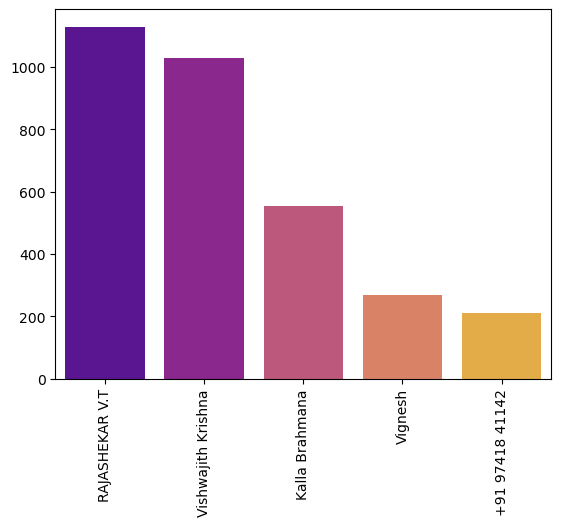

In [186]:
import matplotlib.pyplot as plt;
import seaborn as sns;
fig,ax=plt.subplots()
sns.barplot(x=count.index,y=count.values,data=new_df,palette='plasma')
plt.xticks(rotation='vertical')

In [187]:
from wordcloud import WordCloud;
df=df[df['Users']=='Vignesh']
wc = WordCloud(width=500, height=500,
                   min_font_size=10, background_color='white')
df_wc = wc.generate(df['Messages'].str.cat(sep=" "))

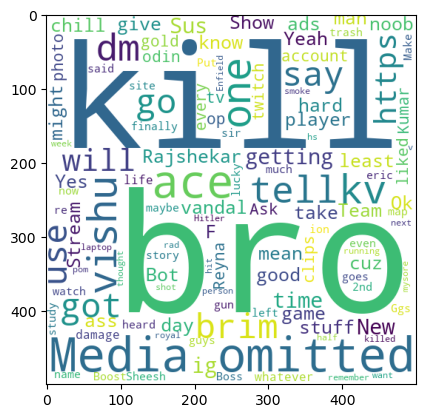

In [188]:

%matplotlib inline
df_wc
plt.imshow(df_wc)

In [189]:
from nltk.corpus import stopwords;
df=df[df['Users']=='Vignesh']
words=[]
temp=df[(df['Users']!='Group Notification') | (df['Users']!='<Media omitted>')]
for message in temp['Messages']:
    for word in message.lower().split():
        if word not in stopwords.words('english'):
            words.append(word)

In [190]:
words[:5]

['pro👌🏼', 'tenz', 'lite', 'mean', 'gold']

In [191]:
from collections import Counter;
mostcommon=pd.DataFrame(Counter(words).most_common(20))

In [192]:
mostcommon

,0,1
0,😂😂,15
1,get,14
2,bro,13
3,<media,10
4,omitted>,10
5,😂😂😂,8
6,vishu,7
7,one,7
8,like,7
9,ace,7


<AxesSubplot:xlabel='1', ylabel='0'>

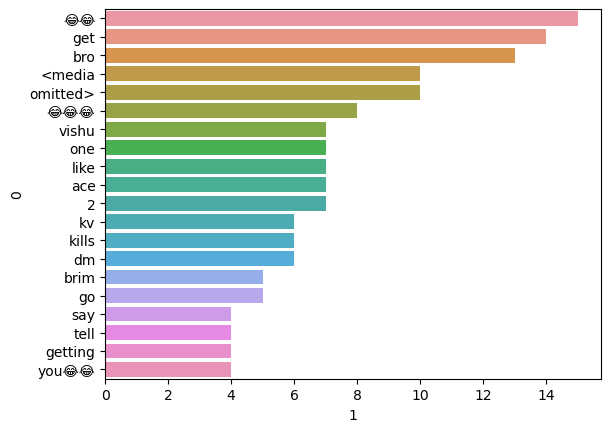

In [193]:
fig,ax=plt.subplots()
sns.barplot(y=mostcommon[0],x=mostcommon[1])

In [194]:
import emoji;

In [195]:
emojiz=[]
for message in df['Messages']:
    emojis=([c for c in message if c in emoji.distinct_emoji_list(message)])
    emojiz.extend(emojis)

In [196]:
np.unique(emojiz)

array(['🌚', '🎂', '🎊', '👌', '💥', '📈', '😂', '😎', '😯', '🤝', '🤡'], dtype='<U1')

In [197]:
for message in df['Messages']:
        emojis.extend([c for c in message if c in emoji.distinct_emoji_list(message)])

In [198]:
np.unique(emojis)

array(['🌚', '🎂', '🎊', '👌', '💥', '📈', '😂', '😎', '😯', '🤝', '🤡'], dtype='<U1')

In [199]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [200]:
emoji_df

,0,1
0,😂,193
1,🌚,4
2,🤝,4
3,💥,2
4,🤡,2
5,📈,1
6,🎊,1
7,🎂,1
8,😯,1
9,👌,1


In [201]:
emoji_df.columns=['Emoji','Count']

In [202]:
emojicount=list(emoji_df['Count'])
perlist=[(i/sum(emojicount))*100 for i in emojicount]

In [203]:
perlist

[91.4691943127962,
 1.8957345971563981,
 1.8957345971563981,
 0.9478672985781991,
 0.9478672985781991,
 0.47393364928909953,
 0.47393364928909953,
 0.47393364928909953,
 0.47393364928909953,
 0.47393364928909953,
 0.47393364928909953]

In [204]:
temp=df.groupby(['Year','Month_num','Month']).count()['Messages'].reset_index()
time=[]
for i in range(temp.shape[0]):
        time.append(temp['Month'][i]+'-'+str(temp['Year'][i]))  

In [205]:
temp

,Year,Month_num,Month,Messages
0,2021,4,April,1
1,2021,7,July,13
2,2021,8,August,1
3,2021,9,September,4
4,2021,10,October,5
5,2021,11,November,32
6,2021,12,December,18
7,2022,1,January,38
8,2022,2,February,23
9,2022,4,April,14


In [206]:
temp['Time']=time

In [207]:
temp['Time']

0         April-2021
1          July-2021
2        August-2021
3     September-2021
4       October-2021
5      November-2021
6      December-2021
7       January-2022
8      February-2022
9         April-2022
10          May-2022
11         June-2022
12         July-2022
13       August-2022
14    September-2022
15      October-2022
Name: Time, dtype: object

In [208]:
temp

,Year,Month_num,Month,Messages,Time
0,2021,4,April,1,April-2021
1,2021,7,July,13,July-2021
2,2021,8,August,1,August-2021
3,2021,9,September,4,September-2021
4,2021,10,October,5,October-2021
5,2021,11,November,32,November-2021
6,2021,12,December,18,December-2021
7,2022,1,January,38,January-2022
8,2022,2,February,23,February-2022
9,2022,4,April,14,April-2022


2022-10-22 20:51:05.498 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-10-22 20:51:05.500 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


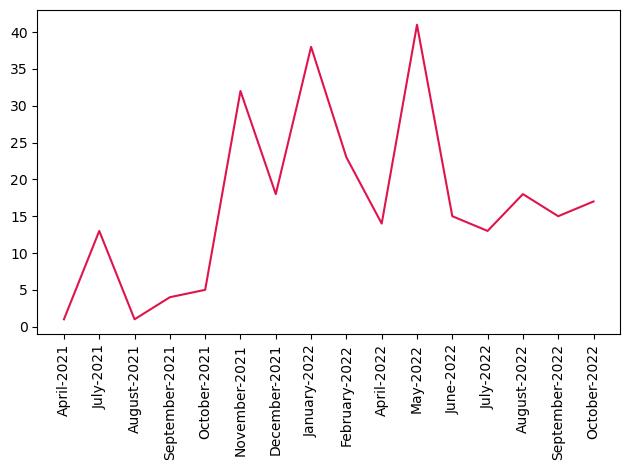

In [209]:

fig,ax=plt.subplots()
ax.plot(temp['Time'],temp['Messages'],color='#E0144C')
plt.xticks(rotation='vertical')
plt.tight_layout()

In [218]:
busy_month=df['Month'].value_counts()
busy_month.index

Index(['May', 'January', 'November', 'July', 'February', 'October', 'August',
       'September', 'December', 'April', 'June'],
      dtype='object')

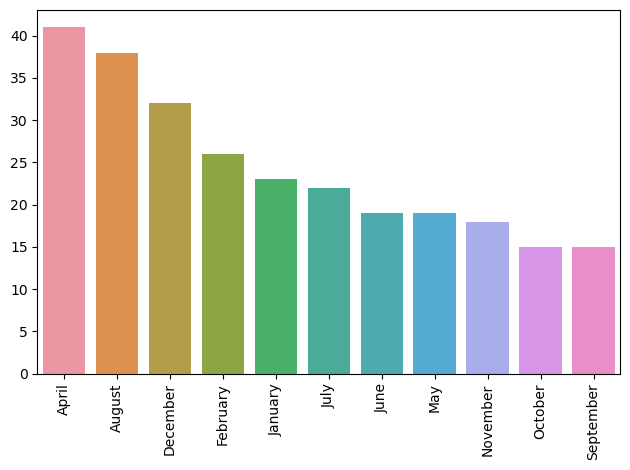

In [224]:
sns.barplot(x=sorted(busy_month.index),y=busy_month.values,)
plt.xticks(rotation='vertical')
plt.tight_layout()

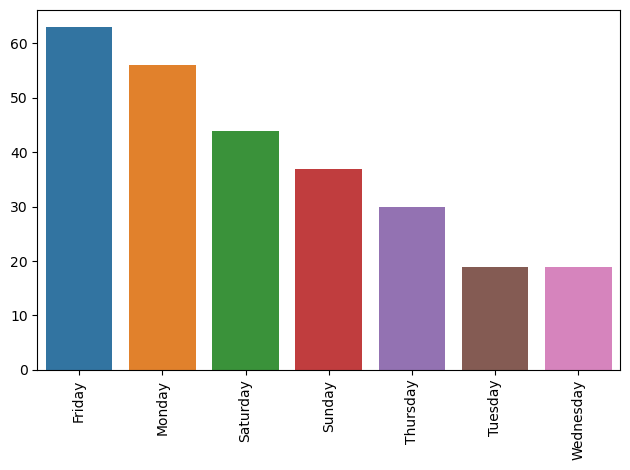

In [229]:
busy_day=df['Day_name'].value_counts()
sns.barplot(x=sorted(busy_day.index),y=busy_day.values)
plt.xticks(rotation='vertical')
plt.tight_layout()